# Stock Trading Strategy - Amritpal Singh

## Imports and Data Exploration

In [1]:
#imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
from collections import defaultdict

In [ ]:
#Chosen companies: Microsoft, Tesla, Nvidia, Amazon, Netflix, Hewlett Packard Enterprise, American Express, Walmart, Proctor & Gamble, Moderna
symbols = ['MSFT', 'TSLA', 'NVDA', 'AMZN', 'NFLX', 'HPE', 'AXP', 'WMT', 'PG', 'MRNA']
stock_data = yf.download(symbols, start='2021-01-01', end='2022-01-01')

[*********************100%%**********************]  10 of 10 completed


In [ ]:
stock_data

Adj Close                                                 \
                  AMZN         AXP        HPE        MRNA        MSFT   
Date                                                                    
2021-01-04  159.331497  113.507057  10.609641  111.730003  212.426941   
2021-01-05  160.925507  114.112869  10.802211  109.180000  212.631836   
2021-01-06  156.919006  118.334282  11.040629  116.260002  207.118408   
2021-01-07  158.108002  117.398262  10.976439  115.089996  213.012405   
2021-01-08  159.134995  117.514053  10.893910  112.750000  214.310242   
...                ...         ...        ...         ...         ...   
2021-12-27  169.669495  159.919952  15.069511  246.880005  336.971710   
2021-12-28  170.660995  159.939423  15.116838  241.440002  335.790863   
2021-12-29  169.201004  159.375198  15.211497  247.880005  336.479675   
2021-12-30  168.644501  159.696228  15.041114  251.600006  333.891754   
2021-12-31  166.716995  159.151459  14.927524  253.979996  330.939789   

                                                                        ...  \
                  NFLX        NVDA          PG        TSLA         WMT  ...   
Date                                                                    ...   
2021-01-04  522.859985  130.851608  128.741653  243.256668  140.390152  ...   
2021-01-05  520.799988  133.757812  129.563675  245.036667  139.642792  ...   
2021-01-06  500.489990  125.872398  130.927490  251.993332  140.514725  ...   
2021-01-07  508.890015  133.151627  129.703781  272.013336  140.505096  ...   
2021-01-08  510.399994  132.480591  129.647720  293.339996  140.485947  ...   
...                ...         ...         ...         ...         ...  ...   
2021-12-27  613.119995  309.051025  155.106369  364.646667  137.006577  ...   
2021-12-28  610.710022  302.828979  155.939499  362.823334  138.972702  ...   
2021-12-29  610.539978  299.623169  157.232330  362.063324  138.904556  ...   
2021-12-30  612.090027  295.478485  155.872482  356.779999  139.352295  ...   
2021-12-31  602.440002  293.730774  156.648163  352.260010  140.831772  ...   

              Volume                                                  \
                AMZN      AXP       HPE      MRNA      MSFT     NFLX   
Date                                                                   
2021-01-04  88228000  3472100   8007200  22439600  37130100  4444400   
2021-01-05  53110000  2112700  10969100  15450800  23823000  3133900   
2021-01-06  87896000  5861500   9752200  21590900  35930700  5346200   
2021-01-07  70290000  8696600  10019700  20614100  27694500  3686400   
2021-01-08  70754000  2934500  10151100  12376900  22956200  2973900   
...              ...      ...       ...       ...       ...      ...   
2021-12-27  58688000  1687300   4456300   8252300  19947000  2061500   
2021-12-28  54638000  2035300   6010800   9288000  15661500  1882800   
2021-12-29  35754000  2082200   5867300   9144600  15042000  1287200   
2021-12-30  37584000  1632900   6608100   6581800  15994500  1625100   
2021-12-31  47830000  1743600   4315900   6822000  18000800  1995900   

                                                     
                NVDA        PG       TSLA       WMT  
Date                                                 
2021-01-04  56064000   8330900  145914600  10727400  
2021-01-05  32276000   6856400   96735600   8832700  
2021-01-06  58042400  10578000  134100000   7306300  
2021-01-07  46148000   7355400  154496700   6846000  
2021-01-08  29252800   7448500  225166500   8159400  
...              ...       ...        ...       ...  
2021-12-27  40368600   4548600   71145900   5346900  
2021-12-28  42059100   5929400   60324000   5261000  
2021-12-29  34313900   5346100   56154000   4348400  
2021-12-30  30886400   5911500   47040900   4983000  
2021-12-31  26653000   5327000   40733700   5982600  

[252 rows x 60 columns]

In [ ]:
stock_data.loc[:, 'Open']

,AMZN,AXP,HPE,MRNA,MSFT,NFLX,NVDA,PG,TSLA,WMT
Date,,,,,,,,,,
2021-01-04,163.500000,121.300003,11.90,107.230003,222.529999,539.000000,131.042496,139.660004,239.820007,144.300003
2021-01-05,158.300507,118.260002,11.57,113.820000,217.259995,521.549988,130.997498,137.990005,241.220001,146.600006
2021-01-06,157.324005,121.000000,11.96,111.110001,212.169998,511.970001,132.225006,138.770004,252.830002,145.089996
2021-01-07,157.850006,124.099998,12.16,120.099998,214.039993,508.279999,129.675003,139.750000,259.209991,147.619995
2021-01-08,159.000000,122.070000,11.98,116.519997,218.679993,511.309998,133.625000,138.470001,285.333344,146.880005
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,171.037003,165.000000,15.75,243.000000,335.459991,615.000000,296.600006,160.669998,357.890015,139.600006
2021-12-28,170.182495,163.600006,15.90,245.365005,343.149994,614.950012,313.119995,161.960007,369.829987,140.600006
2021-12-29,170.839996,164.619995,15.97,239.330002,341.299988,610.710022,302.730011,163.210007,366.213318,142.660004


In [ ]:
stock_data['Adj Close']

,AMZN,AXP,HPE,MRNA,MSFT,NFLX,NVDA,PG,TSLA,WMT
Date,,,,,,,,,,
2021-01-04,159.331497,113.507057,10.609641,111.730003,212.426941,522.859985,130.851608,128.741653,243.256668,140.390152
2021-01-05,160.925507,114.112869,10.802211,109.180000,212.631836,520.799988,133.757812,129.563675,245.036667,139.642792
2021-01-06,156.919006,118.334282,11.040629,116.260002,207.118408,500.489990,125.872398,130.927490,251.993332,140.514725
2021-01-07,158.108002,117.398262,10.976439,115.089996,213.012405,508.890015,133.151627,129.703781,272.013336,140.505096
2021-01-08,159.134995,117.514053,10.893910,112.750000,214.310242,510.399994,132.480591,129.647720,293.339996,140.485947
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,169.669495,159.919952,15.069511,246.880005,336.971710,613.119995,309.051025,155.106369,364.646667,137.006577
2021-12-28,170.660995,159.939423,15.116838,241.440002,335.790863,610.710022,302.828979,155.939499,362.823334,138.972702
2021-12-29,169.201004,159.375198,15.211497,247.880005,336.479675,610.539978,299.623169,157.232330,362.063324,138.904556


In [ ]:
#plot all graphs - data exploration
def plot_without_crosses(data):
  fig, axs = plt.subplots(5, 2, figsize=(15, 15))
  fig.suptitle('Stock Prices')

  for i, symbol in enumerate(symbols):
      row, col = divmod(i, 2)
      axs[row, col].plot(data['Adj Close'][symbol],label='Actual Price', color='blue')
      axs[row, col].set_title(symbol)
      axs[row, col].set_xlabel('Date')
      axs[row, col].set_ylabel('Price (in USD)')
      axs[row, col].legend()

  plt.tight_layout()

  plt.show()

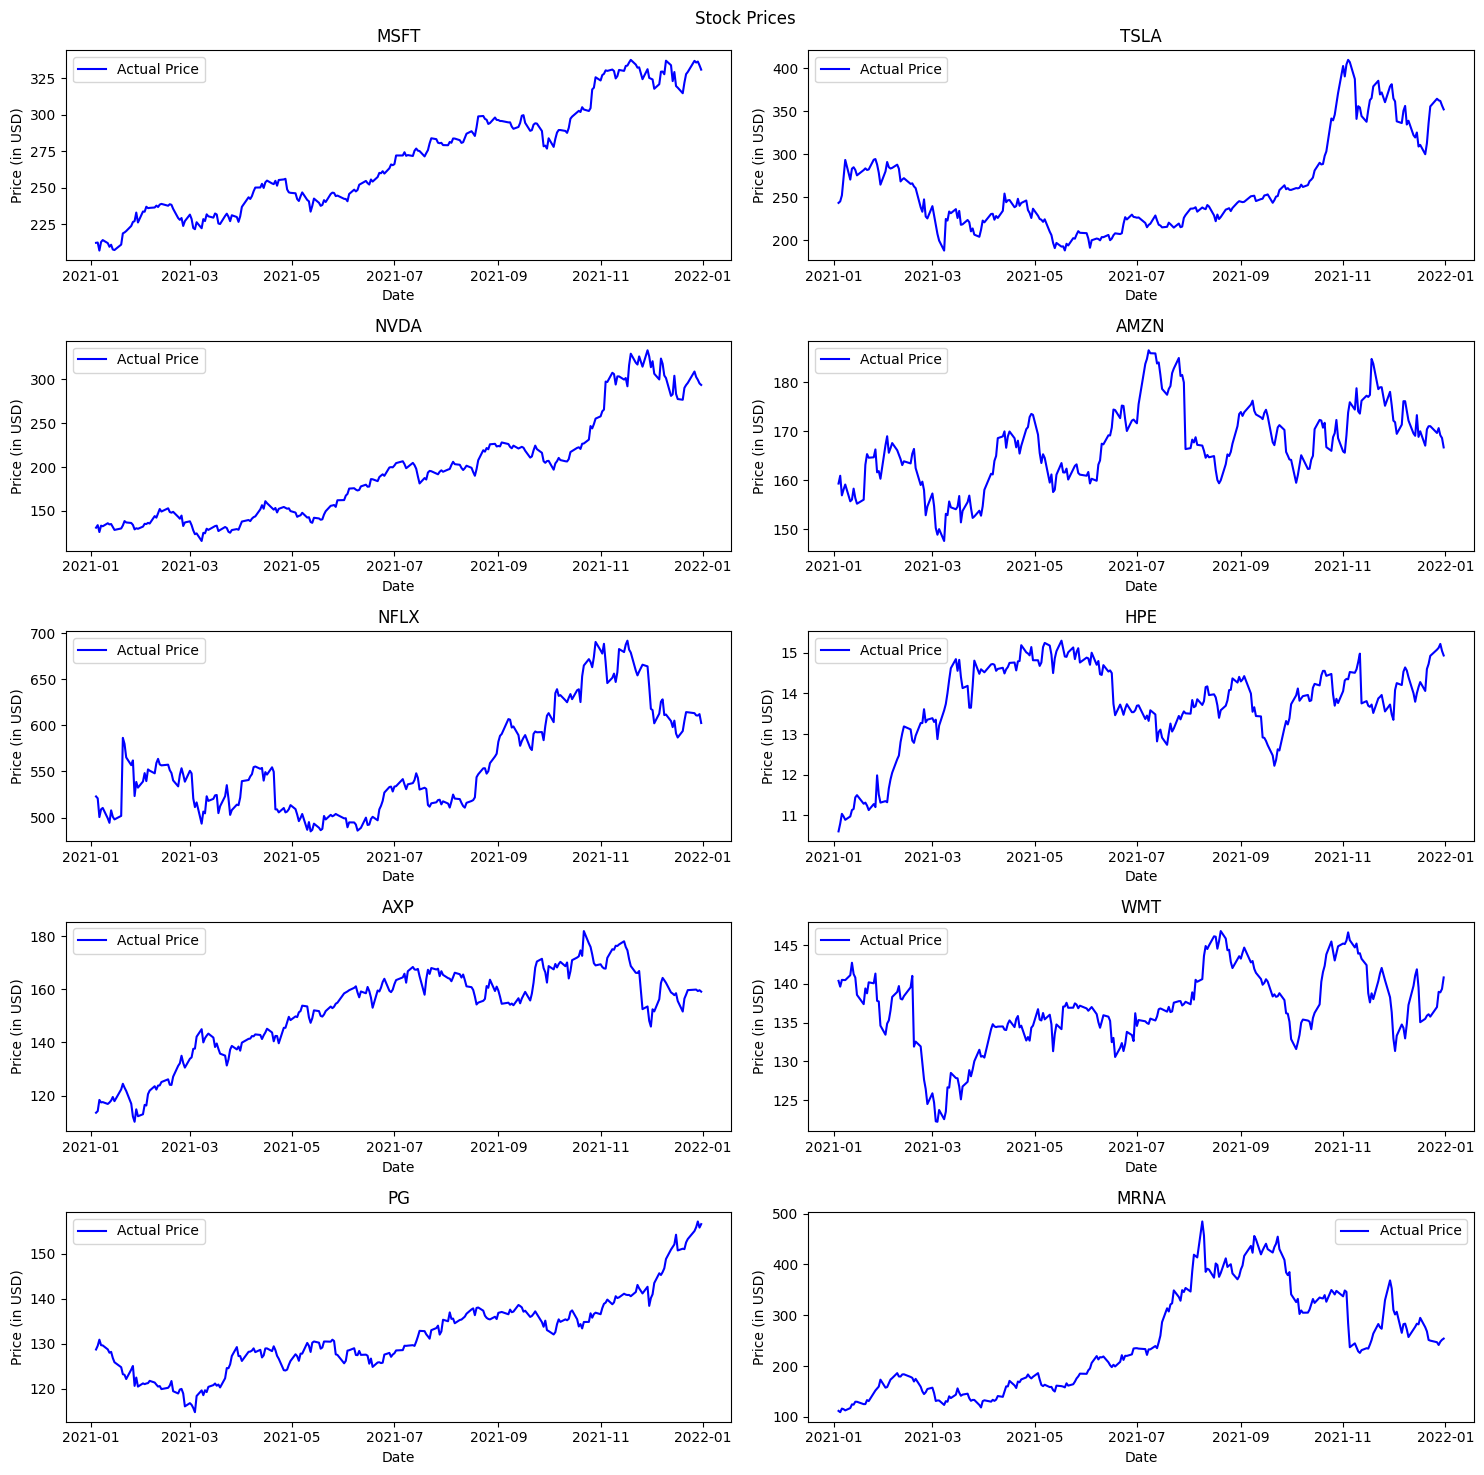

In [ ]:
plot_without_crosses(stock_data)

## Apply Strategy to find best long and short windows

In [ ]:
#calculates Simple Moving Average
def simple_moving_average(data, window_size):
    rolling_sma = data['Adj Close'].rolling(window=window_size).mean()
    return data['Adj Close'].rolling(window=window_size).mean()

In [ ]:
#returns dataframe with Adjusted Close and Open of a selected stock given the symbol, start and end date
def fetch_data(stock, start_date, end_date):
  raw = yf.download(stock, start=start_date, end=end_date).dropna()
  tempStockData = pd.DataFrame(raw['Adj Close'])
  tempStockData = tempStockData.join(raw['Open'], on="Date")
  return tempStockData

In [ ]:
#finds the small and long window values alongside the basic strategy (1,-1 represent whether we should buy or sell - we filter this further later on)
def execute_strategy(stockData, long_window, short_window):
  tempStockData = stockData
  tempStockData['SMA Long'] = simple_moving_average(tempStockData, long_window)
  tempStockData['SMA Short'] = simple_moving_average(tempStockData, short_window)
  tempStockData['Position'] = np.where(tempStockData['SMA Short'] > tempStockData['SMA Long'], 1, -1)
  return tempStockData

In [ ]:
#calculates the profit given a dataframe with positions - applies further filtering (we only sell if the current_adj_close is greater than the last_buy price) and returns final investment
def get_final_investment(stockData, investment):
  cash_available = investment
  shares_owned = 0
  last_buy_price = 0
  for i in range(1, len(stockData)-1):
      position = stockData.iloc[i]['Position']
      current_adj_close = stockData.iloc[i]['Adj Close']
      next_open = stockData.iloc[i+1]['Open'] #buy next day?

      if position == 1:  # Buy signal
          shares_to_buy = cash_available // current_adj_close  # Max shares to buy
          cost = shares_to_buy * current_adj_close
          cash_available -= cost
          shares_owned += shares_to_buy
          if shares_to_buy >= 1:
            last_buy_price = current_adj_close

      elif position == -1 and current_adj_close>last_buy_price:  # Sell signal
          revenue = shares_owned * next_open
          cash_available += revenue
          shares_owned = 0

  final_investment = cash_available + shares_owned * current_adj_close
  return final_investment


In [ ]:
#loops through all stocks we declared and finds best short and long values, placing them all in the ideal_dic
ideal_dic = {}

for stock in symbols:
  temp_stock_data = fetch_data(stock, '2021-01-01', '2022-01-01')
  max_profit = 0
  for long_val in range(20,51):
    for short_val in range(1,20):
      strategy_df = execute_strategy(temp_stock_data, long_val, short_val)
      profit = get_final_investment(strategy_df, 10000)
      if profit>max_profit:
        max_profit = profit
        ideal_dic[stock] = long_val, short_val, max_profit


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
ideal_dic

{'MSFT': (37, 2, 16422.890228271484),
 'TSLA': (35, 4, 16778.994567871094),
 'NVDA': (22, 2, 20424.433853149414),
 'AMZN': (20, 8, 11020.036422729492),
 'NFLX': (20, 11, 12596.583251953125),
 'HPE': (21, 19, 25458.233471870422),
 'AXP': (20, 16, 19393.76406097412),
 'WMT': (20, 11, 13543.505142211914),
 'PG': (20, 19, 18103.88906097412),
 'MRNA': (44, 13, 25872.489501953125)}

## Plot all graphs with applied short and long windows for each stock

In [ ]:
#re-executes same code as get_final_investment(), except returns two sets telling us the days at which we actually bought and sold - rule added
def find_position_changes(stock_data, long_window, short_window):
  cash_available = 10000
  shares_owned = 0
  last_buy_price = 0
  temp_buy_set = set()
  temp_sell_set = set()
  for i in range(1, len(stock_data)-1):
      position = stock_data.iloc[i]['Position']
      current_adj_close = stock_data.iloc[i]['Adj Close']
      next_open = stock_data.iloc[i+1]['Open']
      if position == 1:
          shares_to_buy = cash_available // current_adj_close  # Max shares to buy
          cost = shares_to_buy * current_adj_close
          cash_available -= cost
          shares_owned += shares_to_buy
          if shares_to_buy >= 1:
            temp_buy_set.add(stock_data.index[i])
            last_buy_price = current_adj_close

      elif position == -1 and current_adj_close>last_buy_price:  # Sell signal - we added the rule to only sell if the current_adj_close is > last_buy_price, so we won't sell at a loss
          revenue = shares_owned * next_open
          cash_available += revenue
          if shares_owned != 0:
            temp_sell_set.add(stock_data.index[i])
          shares_owned = 0

  return temp_buy_set, temp_sell_set

In [ ]:
#plots all 10 stock graphs with best short and long windows as well as crosses (I plotted them on the actual stock line since we only sell if adj_close>last_buy_price)
def plot_all(start_date, end_date):
  for stock in ideal_dic:
    temp_stock_data = fetch_data(stock, start_date, end_date)
    temp_stock_data = execute_strategy(temp_stock_data, ideal_dic[stock][0], ideal_dic[stock][1])
    temp_buy_set, temp_sell_set = find_position_changes(temp_stock_data, ideal_dic[stock][0], ideal_dic[stock][1])


    plt.figure(figsize=(8, 5))
    plt.plot(temp_stock_data['Adj Close'], label='Adj Close')
    plt.plot(temp_stock_data['SMA Short'], label= f"SMA {ideal_dic[stock][1]} days")
    plt.plot(temp_stock_data['SMA Long'], label = f"LMA {ideal_dic[stock][0]} days")

    # Plotting the Golden Crosses with a green circle
    plt.scatter(temp_stock_data.index[temp_stock_data.index.isin(temp_buy_set)],
                temp_stock_data.loc[temp_stock_data.index.isin(temp_buy_set), 'Adj Close'],
                marker='^', color='g', label='Golden Cross', alpha=1)

    for datetime_value in temp_buy_set:
        plt.axvline(x=datetime_value, color='g', linestyle='--', linewidth=1.5)

    # Plotting the Death Crosses with a red 'x'
    plt.scatter(temp_stock_data.index[temp_stock_data.index.isin(temp_sell_set)],
                temp_stock_data.loc[temp_stock_data.index.isin(temp_sell_set), 'Adj Close'],
                marker='v', color='r', label='Death Cross', alpha=1)

    for datetime_value in temp_sell_set:
        plt.axvline(x=datetime_value, color='r', linestyle='--', linewidth=1.5)

    plt.title(f"{stock} SMA Strategy")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

[*********************100%%**********************]  1 of 1 completed


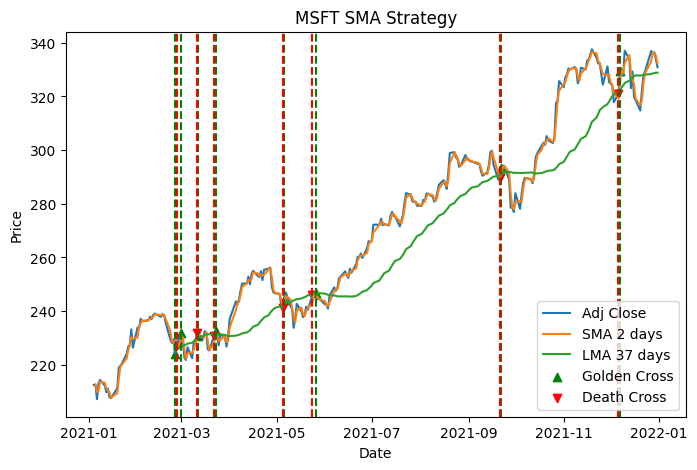

[*********************100%%**********************]  1 of 1 completed


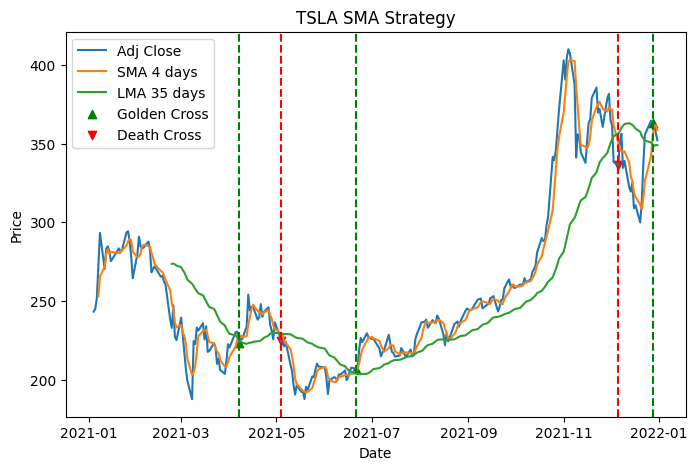

[*********************100%%**********************]  1 of 1 completed


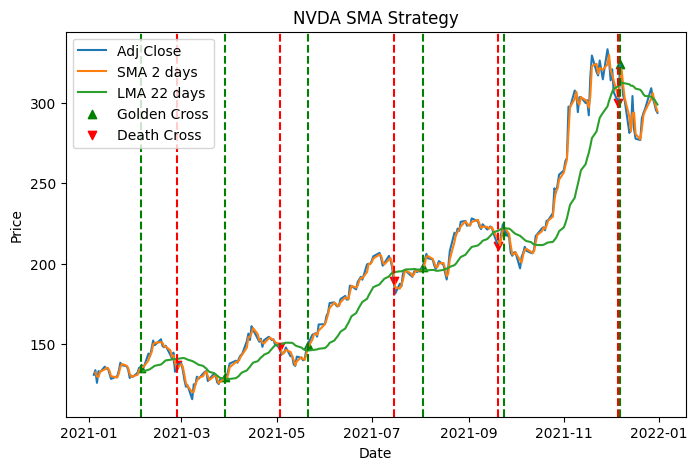

[*********************100%%**********************]  1 of 1 completed


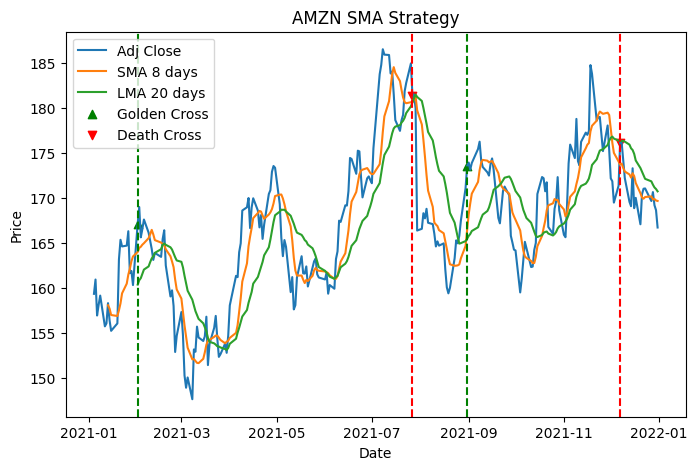

[*********************100%%**********************]  1 of 1 completed


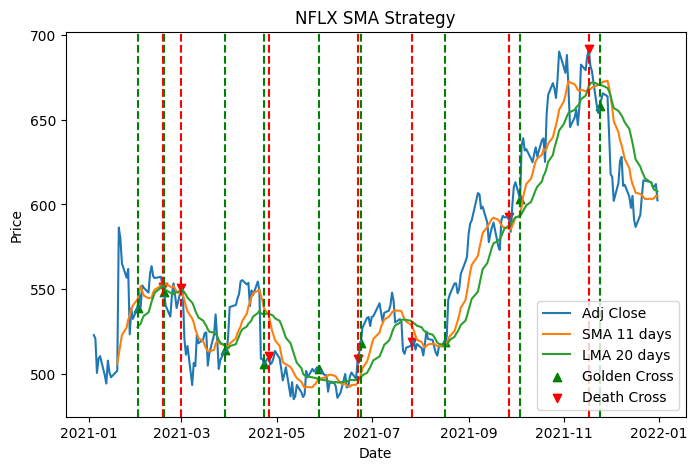

[*********************100%%**********************]  1 of 1 completed


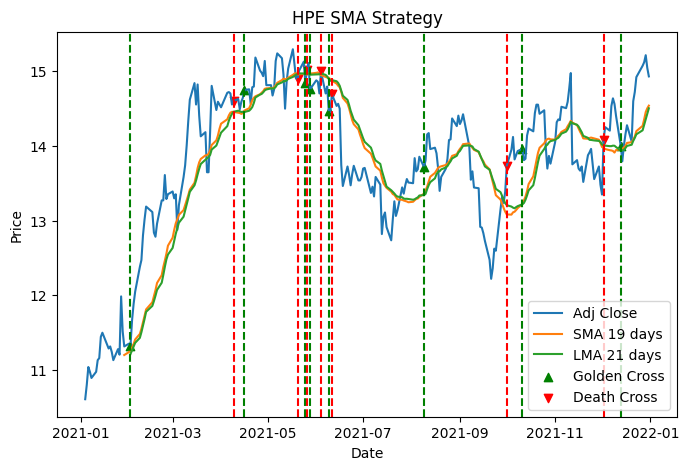

[*********************100%%**********************]  1 of 1 completed


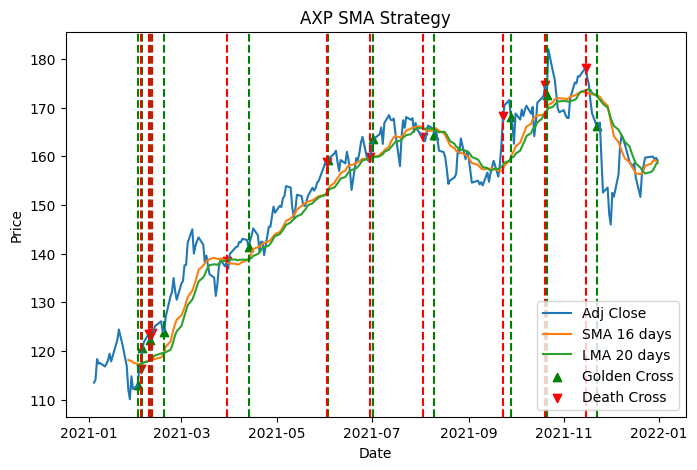

[*********************100%%**********************]  1 of 1 completed


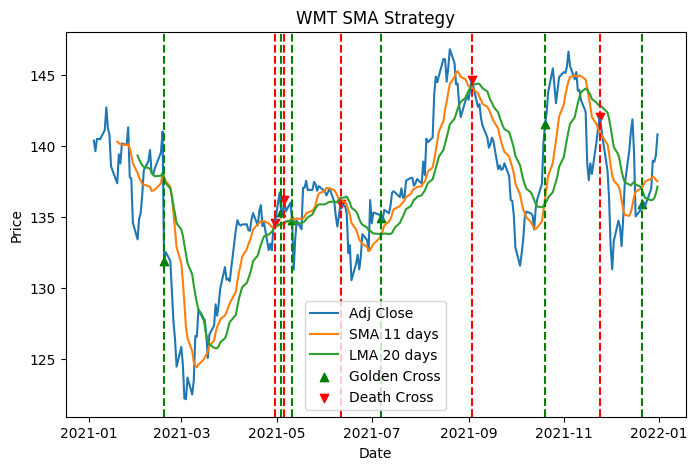

[*********************100%%**********************]  1 of 1 completed


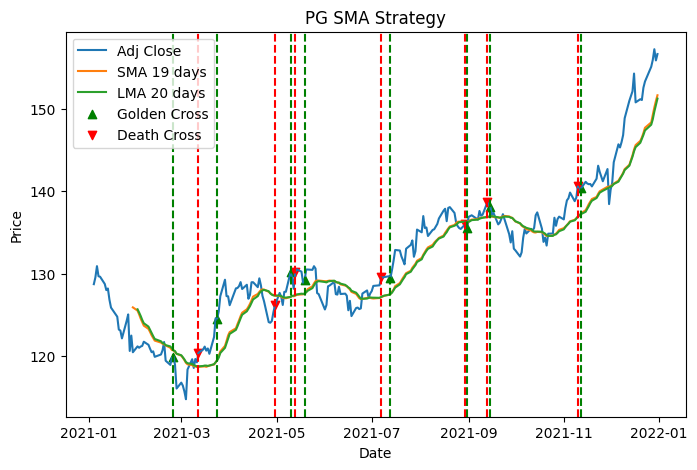

[*********************100%%**********************]  1 of 1 completed


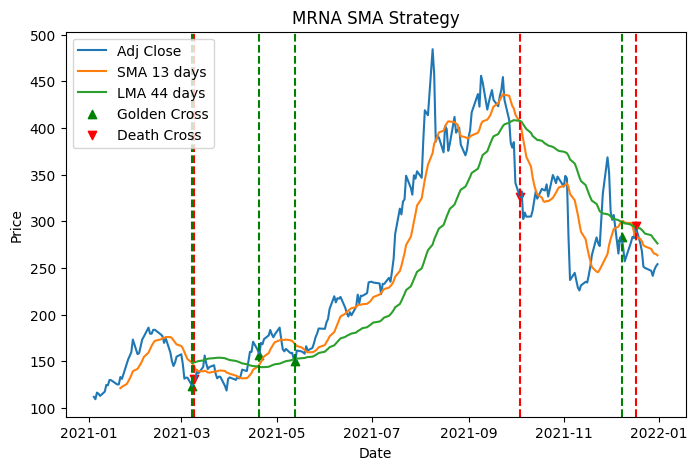

In [ ]:
plot_all('2021-01-01', '2022-01-01')

## Find best aggregate windows

In [ ]:
#same concept as ideal_dic code, except we sum up the final investments for each short, long window combination, placing them into the agg_dic. The key of the maximum value in the dictionary tells us the best performing short and long_windows
agg_dic = defaultdict(float)

for stock in symbols:
  temp_stock_data = fetch_data(stock, '2021-01-01', '2022-01-01')
  for long_val in range(20,51):
    for short_val in range(1,20):
      strategy_df = execute_strategy(temp_stock_data, long_val, short_val)
      profit = get_final_investment(strategy_df, 10000)
      agg_dic[long_val, short_val] += profit

max_key = max(agg_dic, key=agg_dic.get)
max_value = agg_dic[max_key]

print(f"Best long window: {max_key[0]}")
print(f"Best short window: {max_key[1]}")
print(f"Final Investment: {max_value}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Best long window: 20
Best short window: 19
Final Investment: 150571.9662952423


## Calculate Performance of strategy on given dates

In [ ]:
#returns the roi and cagr. For cagr, we find the difference between the dates and divide by 365 to get the amount in years (didn't take into account leap years)
def calculate_performance(final_investment, initial_investment, start_date, end_date):
        roi = (final_investment - initial_investment) / initial_investment * 100
        cagr = ((final_investment / initial_investment) ** (1 / ((datetime.strptime(end_date, '%Y-%m-%d') - datetime.strptime(start_date, '%Y-%m-%d')).days/365)) - 1) * 100
        return roi, cagr

In [ ]:
#gives us the statistics for each stock using the individual window strategy. We go through each stock and calculate the roi and cagr. Then, we find the overall_roi and overall_cagr for the timeframe
def strategy_stats(start_date, end_date):
  final_sum = 0
  for stock in ideal_dic:
    data = fetch_data(stock, start_date, end_date);
    data = execute_strategy(data, ideal_dic[stock][0], ideal_dic[stock][1])
    profit = get_final_investment(data, 10000)
    roi, cagr = calculate_performance(profit, 10000, start_date, end_date)
    final_sum += profit
    print(f"Stock Symbol: {stock}")
    print(f"ROI: {roi:.2f}%")
    print(f"CAGR: {cagr:.2f}%")
  overall_roi, overall_cagr = calculate_performance(final_sum, 100000, start_date, end_date)
  print(f"Initial Investment: {100000}")
  print(f"Final Investent: {final_sum}")
  print(f"Overall ROI: {overall_roi}")
  print(f"Overall CAGR: {overall_cagr}")

In [ ]:
#gives us the statistics for each stock using the aggregate window strategy. Same code as strategy_stats, except we use constant windows which don't vary depending on stock
def aggregate_stats(start_date, end_date):
  final_sum = 0
  for stock in ideal_dic:
    data = fetch_data(stock, start_date, end_date);
    data = execute_strategy(data, max_key[0], max_key[1])
    profit = get_final_investment(data, 10000)
    roi, cagr = calculate_performance(profit, 10000, start_date, end_date)
    final_sum += profit
    print(f"Stock Symbol: {stock}")
    print(f"ROI: {roi:.2f}%")
    print(f"CAGR: {cagr:.2f}%")
  overall_roi, overall_cagr = calculate_performance(final_sum, 100000, start_date, end_date)
  print(f"Initial Investment: {100000}")
  print(f"Final Investent: {final_sum}")
  print(f"Overall ROI: {overall_roi}")
  print(f"Overall CAGR: {overall_cagr}")

In [ ]:
#buy and hold method. we buy as many stocks we can at the start of the timeframe and sell at the end
def hold_stats(start_date, end_date):
  final_sum = 0
  for stock in symbols:
    data = fetch_data(stock, start_date, end_date)
    stocks_bought = 10000//data['Adj Close'][0]
    leftover_investment = 10000%data['Adj Close'][0]
    money_after_sell = stocks_bought*data['Open'][-1]
    final = money_after_sell + leftover_investment
    roi, cagr = calculate_performance(final, 10000, start_date, end_date)
    final_sum+=final
    print(f"Stock Symbol: {stock}")
    print(f"ROI: {roi:.2f}%")
    print(f"CAGR: {cagr:.2f}%")
  overall_roi, overall_cagr = calculate_performance(final_sum, 100000, start_date, end_date)
  print(f"Initial Investment: {100000}")
  print(f"Final Investent: {final_sum}")
  print(f"Overall ROI: {overall_roi}")
  print(f"Overall CAGR: {overall_cagr}")

In [ ]:
strategy_stats('2021-01-01', '2022-01-01')

[*********************100%%**********************]  1 of 1 completed
Stock Symbol: MSFT
ROI: 64.23%
CAGR: 64.23%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: TSLA
ROI: 67.79%
CAGR: 67.79%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: NVDA
ROI: 104.24%
CAGR: 104.24%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: AMZN
ROI: 10.20%
CAGR: 10.20%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: NFLX
ROI: 25.97%
CAGR: 25.97%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: HPE
ROI: 154.58%
CAGR: 154.58%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: AXP
ROI: 93.94%
CAGR: 93.94%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: WMT
ROI: 35.44%
CAGR: 35.44%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: PG
ROI: 81.0

In [ ]:
aggregate_stats('2021-01-01', '2022-01-01')

[*********************100%%**********************]  1 of 1 completed
Stock Symbol: MSFT
ROI: 60.19%
CAGR: 60.19%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: TSLA
ROI: 40.22%
CAGR: 40.22%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: NVDA
ROI: 73.85%
CAGR: 73.85%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: AMZN
ROI: 8.88%
CAGR: 8.88%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: NFLX
ROI: 20.88%
CAGR: 20.88%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: HPE
ROI: 85.70%
CAGR: 85.70%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: AXP
ROI: 88.67%
CAGR: 88.67%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: WMT
ROI: 28.78%
CAGR: 28.78%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: PG
ROI: 81.04%
CAG

In [ ]:
hold_stats('2021-01-01', '2022-01-01')

[*********************100%%**********************]  1 of 1 completed
Stock Symbol: MSFT
ROI: 59.26%
CAGR: 59.26%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: TSLA
ROI: 46.97%
CAGR: 46.97%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: NVDA
ROI: 126.08%
CAGR: 126.08%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: AMZN
ROI: 5.97%
CAGR: 5.97%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: NFLX
ROI: 16.56%
CAGR: 16.56%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: HPE
ROI: 49.84%
CAGR: 49.84%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: AXP
ROI: 44.52%
CAGR: 44.52%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: WMT
ROI: 1.99%
CAGR: 1.99%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: PG
ROI: 26.27%
CAG

## Apply to 2022 - current data

[*********************100%%**********************]  10 of 10 completed


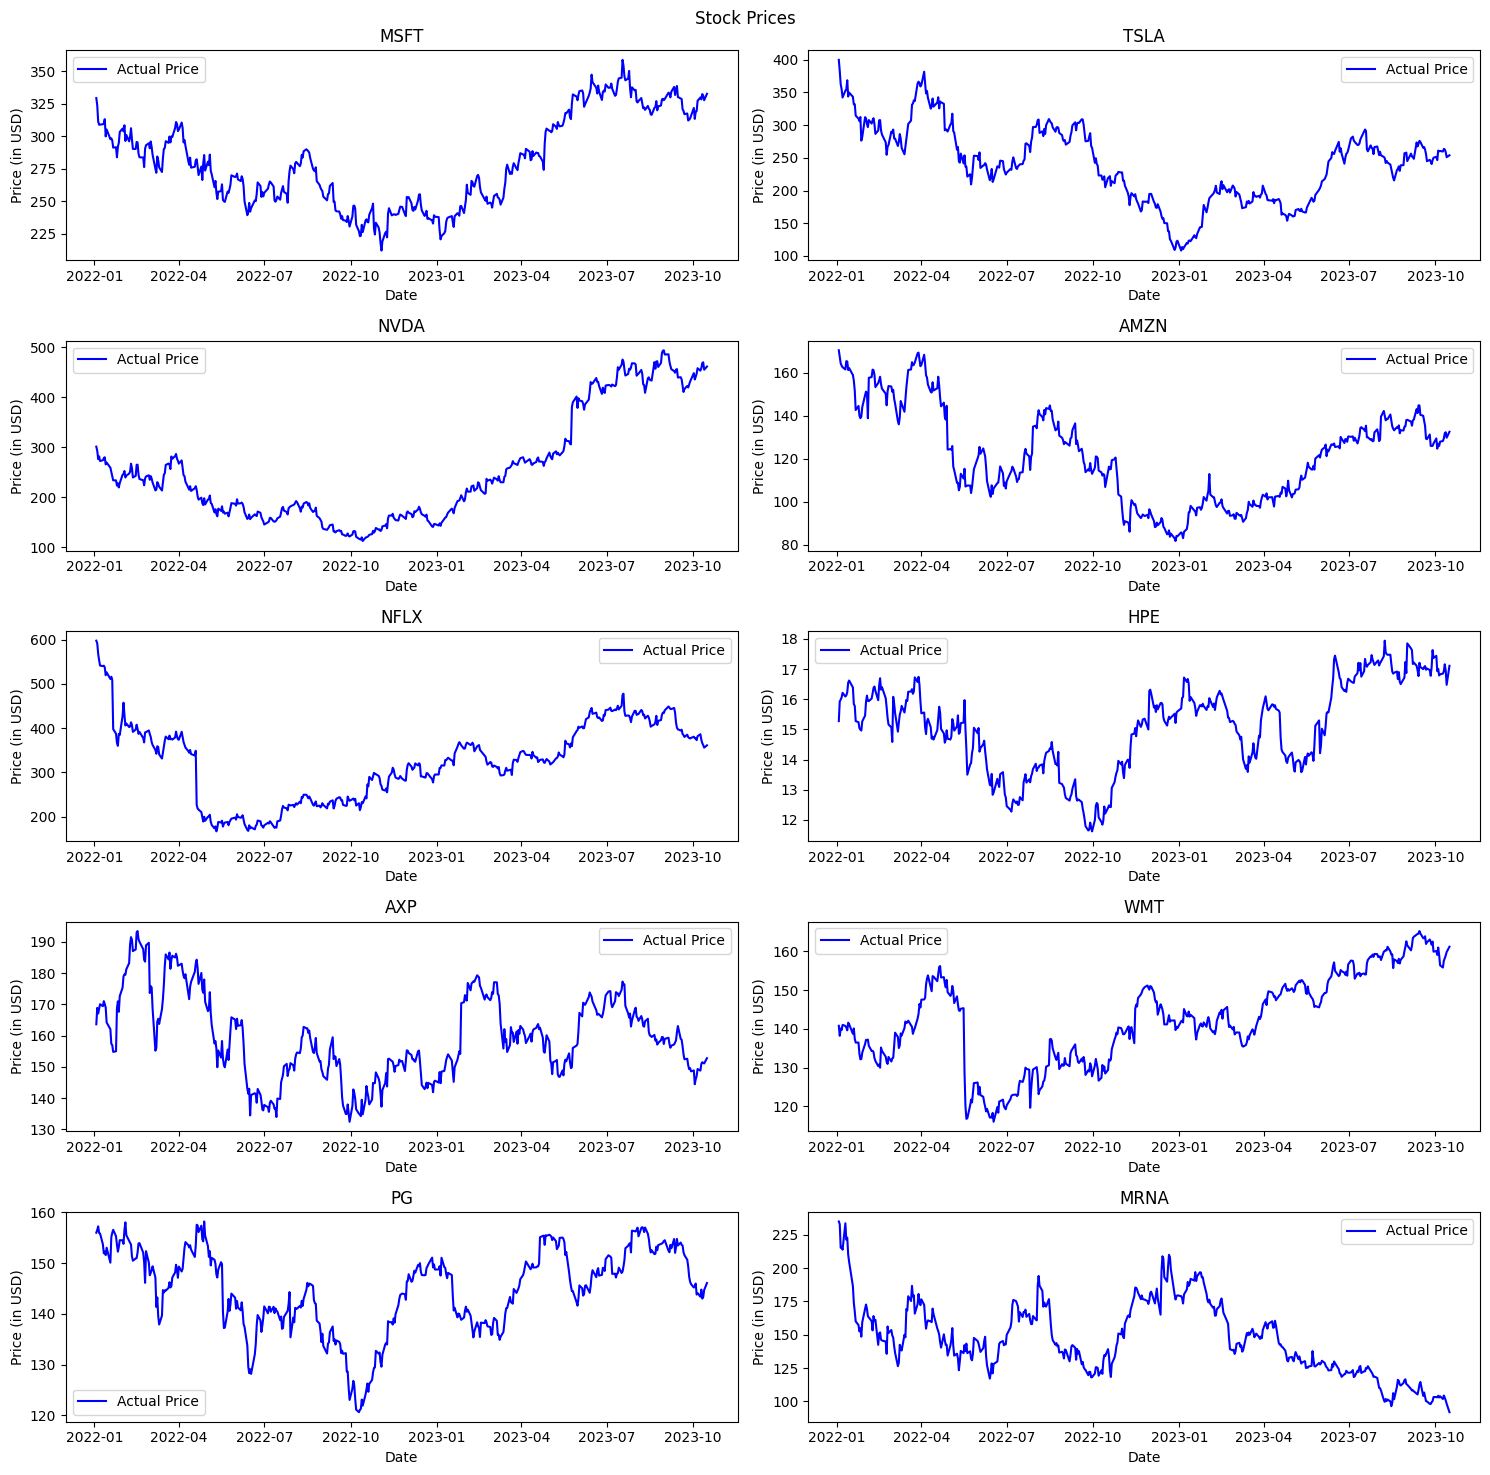

In [ ]:
#data exploration
stock_data = yf.download(symbols, start='2022-01-01', end=date.today())
plot_without_crosses(stock_data)

[*********************100%%**********************]  1 of 1 completed


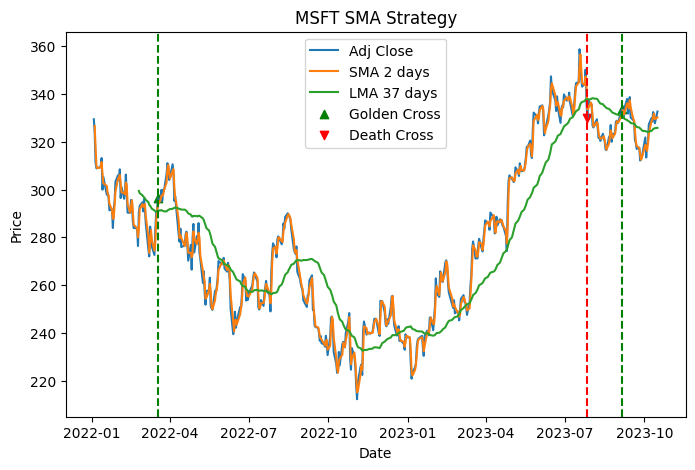

[*********************100%%**********************]  1 of 1 completed


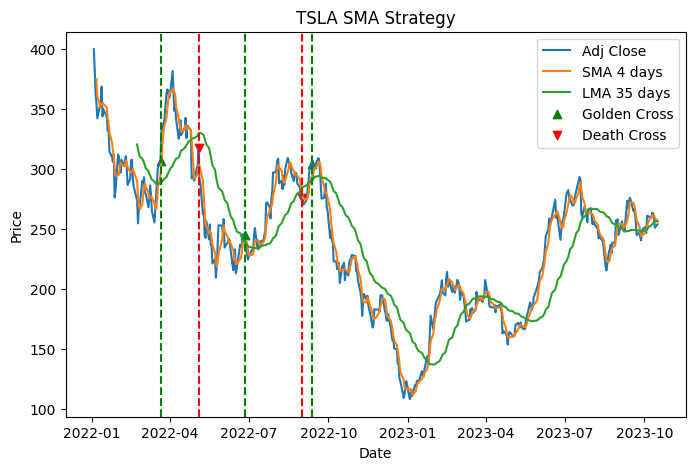

[*********************100%%**********************]  1 of 1 completed


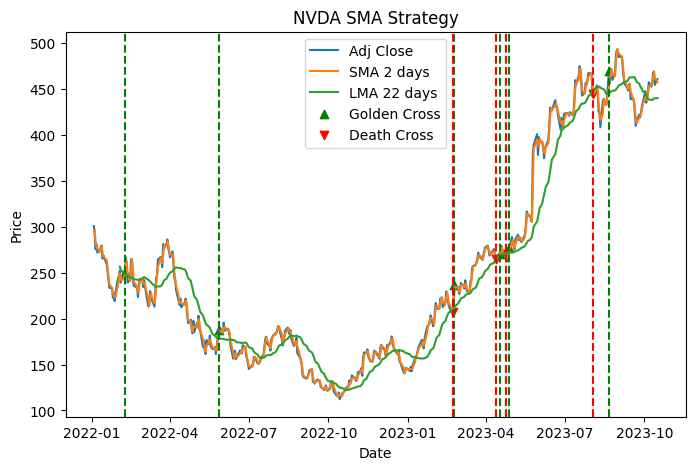

[*********************100%%**********************]  1 of 1 completed


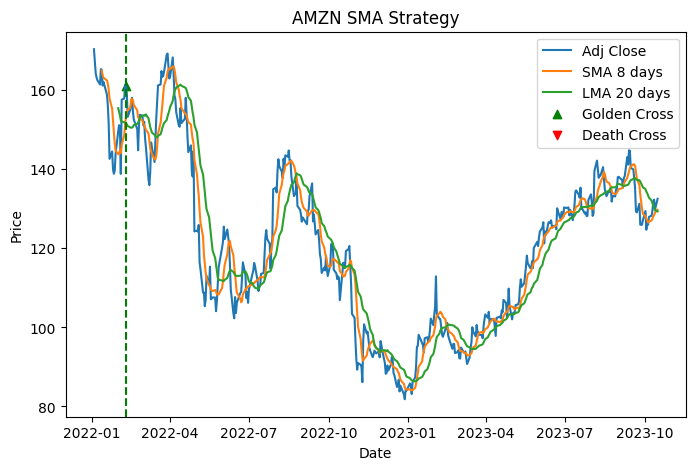

[*********************100%%**********************]  1 of 1 completed


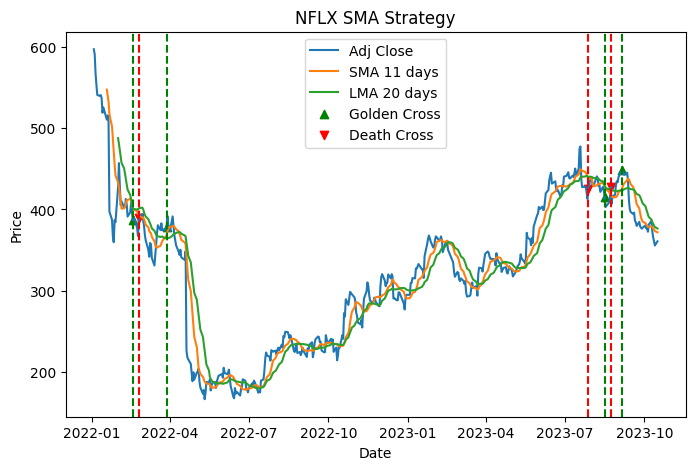

[*********************100%%**********************]  1 of 1 completed


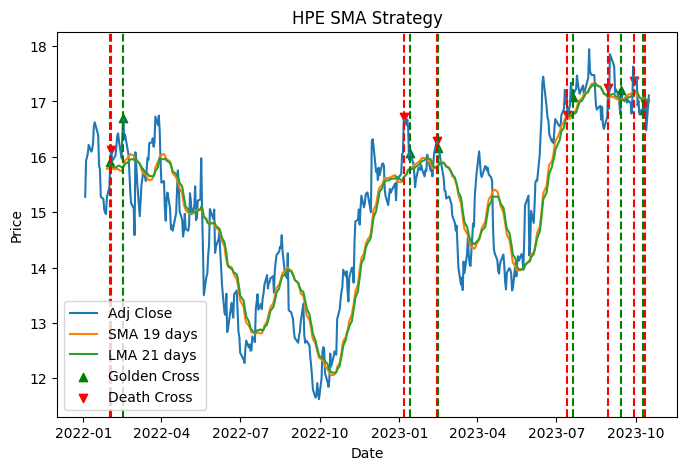

[*********************100%%**********************]  1 of 1 completed


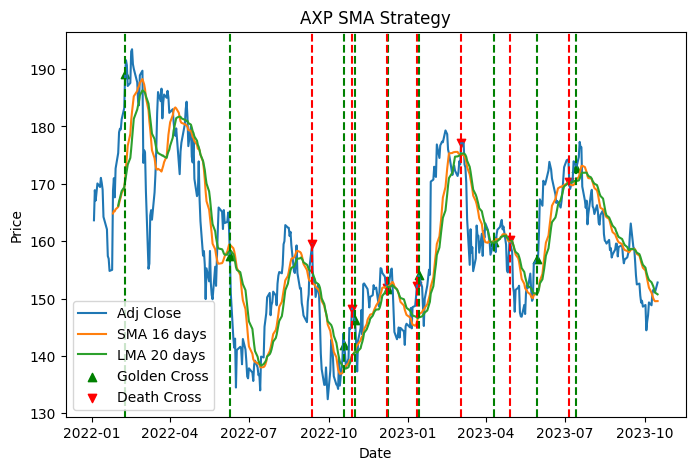

[*********************100%%**********************]  1 of 1 completed


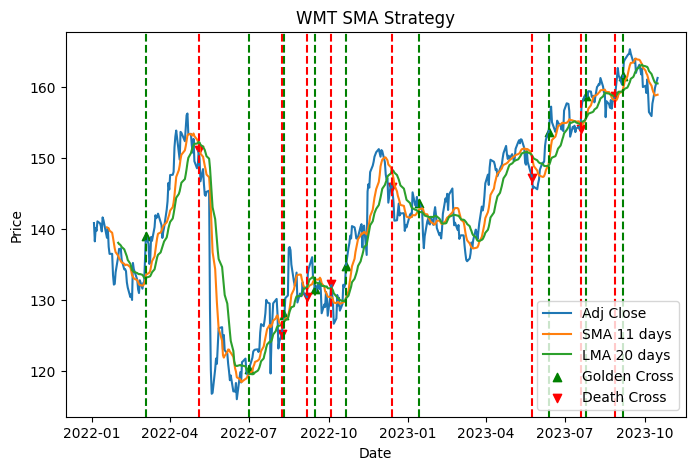

[*********************100%%**********************]  1 of 1 completed


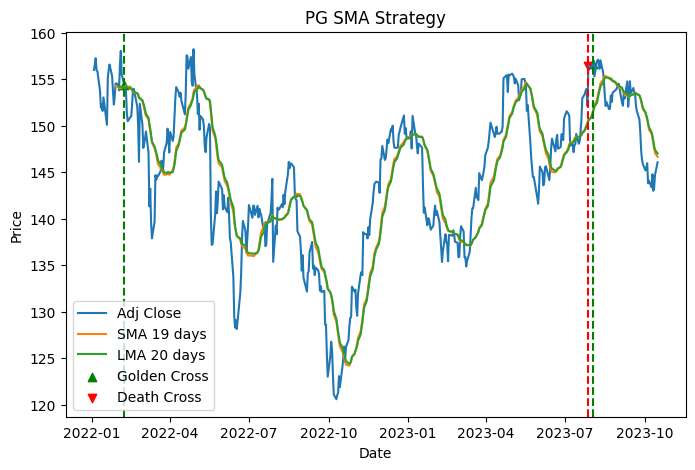

[*********************100%%**********************]  1 of 1 completed


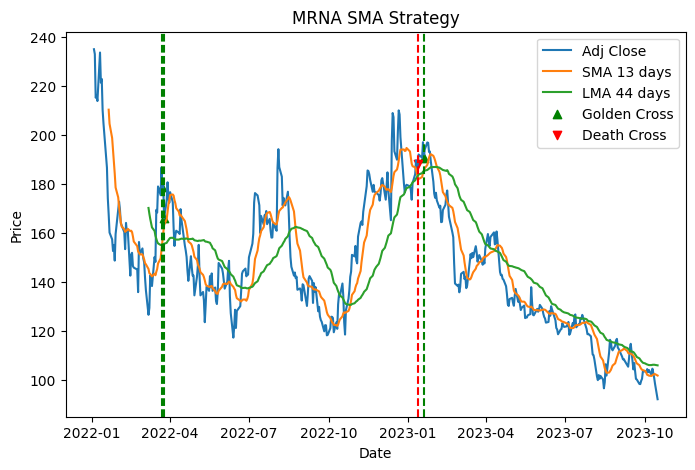

In [ ]:
plot_all('2022-01-01', date.today())

In [ ]:
#find individual window stats
strategy_stats('2022-01-01', str(date.today()))

[*********************100%%**********************]  1 of 1 completed
Stock Symbol: MSFT
ROI: 10.43%
CAGR: 5.69%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: TSLA
ROI: -6.48%
CAGR: -3.67%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: NVDA
ROI: 65.61%
CAGR: 32.52%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: AMZN
ROI: -19.47%
CAGR: -11.38%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: NFLX
ROI: -8.10%
CAGR: -4.60%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: HPE
ROI: 22.00%
CAGR: 11.73%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: AXP
ROI: 5.29%
CAGR: 2.92%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: WMT
ROI: 38.77%
CAGR: 20.06%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: PG
ROI: -6.31%
CA

In [ ]:
#find aggregate window stats
aggregate_stats('2022-01-01', str(date.today()))

[*********************100%%**********************]  1 of 1 completed
Stock Symbol: MSFT
ROI: -0.31%
CAGR: -0.17%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: TSLA
ROI: 43.90%
CAGR: 22.52%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: NVDA
ROI: 80.90%
CAGR: 39.21%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: AMZN
ROI: -20.03%
CAGR: -11.73%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: NFLX
ROI: -3.75%
CAGR: -2.11%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: HPE
ROI: 20.83%
CAGR: 11.14%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: AXP
ROI: -15.14%
CAGR: -8.75%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: WMT
ROI: 19.42%
CAGR: 10.41%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: PG
ROI: -6.31

In [ ]:
#find buy and hold stats
hold_stats('2022-01-01', str(date.today()))

[*********************100%%**********************]  1 of 1 completed
Stock Symbol: MSFT
ROI: 0.50%
CAGR: 0.28%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: TSLA
ROI: -37.47%
CAGR: -23.05%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: NVDA
ROI: 49.44%
CAGR: 25.13%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: AMZN
ROI: -23.03%
CAGR: -13.59%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: NFLX
ROI: -38.59%
CAGR: -23.82%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: HPE
ROI: 8.84%
CAGR: 4.84%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: AXP
ROI: -6.87%
CAGR: -3.90%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: WMT
ROI: 14.02%
CAGR: 7.60%
[*********************100%%**********************]  1 of 1 completed
Stock Symbol: PG
ROI: -6.49%
